<a href="https://colab.research.google.com/github/anugit28/Energy-Consumption-Analysis/blob/main/Energy_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
energy_dataset= "/content/long_data_.csv"
energy_raw= pd.read_csv(energy_dataset)
print(energy_raw.shape)
energy_raw.head()


(16599, 6)


,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [ ]:
 # Display the data types of the DataFrame columns
energy_raw.dtypes

# Convert the 'Dates' column to datetime objects, specifying the correct format
energy_raw['Dates'] = pd.to_datetime(energy_raw['Dates'], format="%d/%m/%Y %H:%M:%S")
energy_raw.dtypes

# You can also use dayfirst=True if the format is consistent but ambiguous
# energy_raw['Dates'] = pd.to_datetime(energy_raw['Dates'], dayfirst=True)

,0
States,object
Regions,object
latitude,float64
longitude,float64
Dates,datetime64[ns]
Usage,float64


In [ ]:
numerical_columns = energy_raw.select_dtypes(include=np.number)
summary_statistics = numerical_columns.describe()
summary_statistics

,latitude,longitude,Usage
count,16599.000000,16599.000000,16599.000000
mean,23.178220,81.794533,103.001862
std,6.146575,7.258429,116.044056
min,8.900373,71.192400,0.300000
25%,19.820430,76.569993,6.700000
50%,23.835404,78.570026,64.400000
75%,27.333330,88.329947,173.900000
max,33.450000,94.216667,522.100000


In [ ]:
# Calculate the difference between consecutive dates
time_diff = energy_raw['Dates'].diff()

# Display the unique time differences and their counts
print(time_diff.value_counts())

Dates
0 days     16101
1 days       475
2 days        10
8 days         5
26 days        3
27 days        3
9 days         1
Name: count, dtype: int64


In [ ]:



fulldate_range=pd.date_range(start="2019-01-02 00:00:00",end="2020-12-05 00:00:00",freq="24h")

# Get the unique sorted dates from the energy_raw DataFrame as a DatetimeIndex for easier comparison
unique_energy_dates = pd.DatetimeIndex(energy_raw['Dates'].sort_values().unique())

# Print the lengths of both DatetimeIndex objects to diagnose the issue
print(f"Length of unique energy dates: {len(unique_energy_dates)}")
print(f"Length of full date range: {len(fulldate_range)}")

# Find the dates present in fulldate_range but not in unique_energy_dates
missing_dates = fulldate_range.difference(unique_energy_dates)

# Print the missing dates and their count
print(f"\nNumber of missing dates: {len(missing_dates)}")
print("Missing dates:")
print(missing_dates)

# You can still keep the assert if you expect NO missing dates.
# If you expect missing dates and just want to identify them, you can remove or modify this assert.
# For now, let's remove the original assert which was causing the error
# assert(unique_energy_dates == fulldate_range).all()

# If you want to assert that there are no missing dates, you can do this:
# assert len(missing_dates) == 0, "There are missing dates in the dataset."

# Or if you want to assert that all unique dates from energy_raw are within the full range (which should be true)
assert unique_energy_dates.isin(fulldate_range).all(), "Some dates in the dataset are outside the expected range."

Length of unique energy dates: 498
Length of full date range: 704

Number of missing dates: 206
Missing dates:
DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-08-07', '2019-09-07', '2019-10-07',
               '2019-11-07', '2019-12-07',
               ...
               '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
               '2020-11-29', '2020-11-30'],
              dtype='datetime64[ns]', length=206, freq=None)


<Axes: xlabel='Usage', ylabel='Count'>

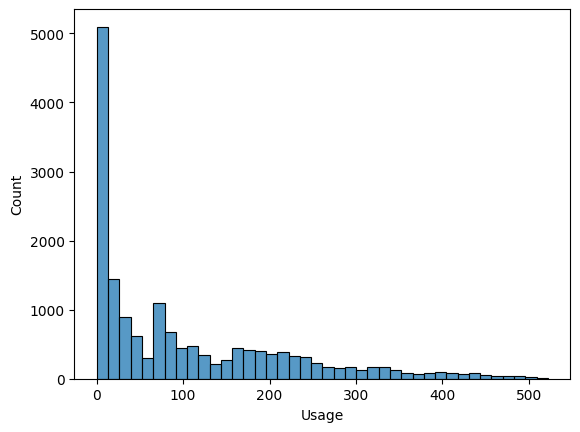

In [ ]:
# Create a histogram of the 'usage' column
sns.histplot(data=energy_raw, x='Usage')

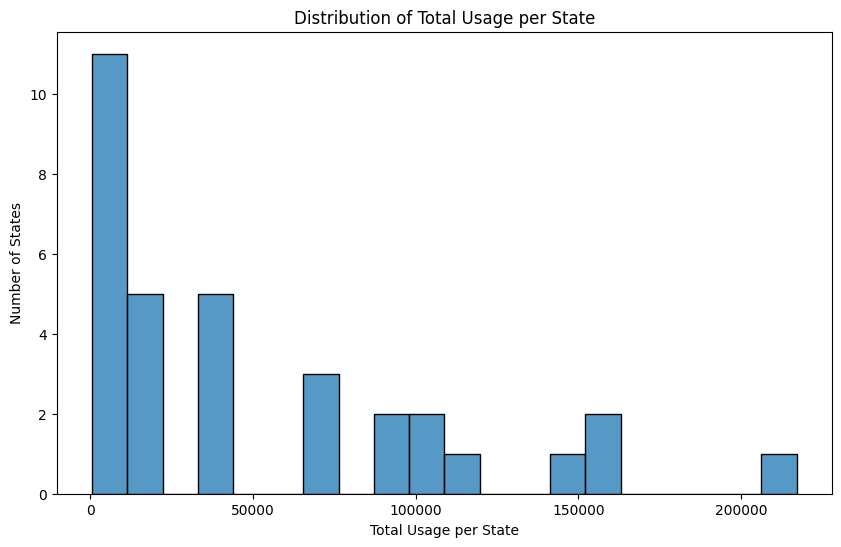

In [ ]:
state_usage_sum = energy_raw.groupby('States')['Usage'].sum()
plt.figure(figsize=(10,6))
sns.histplot(state_usage_sum, bins=20, kde=False)
plt.xlabel('Total Usage per State')
plt.ylabel('Number of States')
plt.title('Distribution of Total Usage per State')
plt.show()

In [ ]:
state_usage_sum.sort_values().head()


,Usage
States,
Sikkim,648.6
Mizoram,858.3
Arunachal Pradesh,1060.9
Nagaland,1087.7
Manipur,1254.8


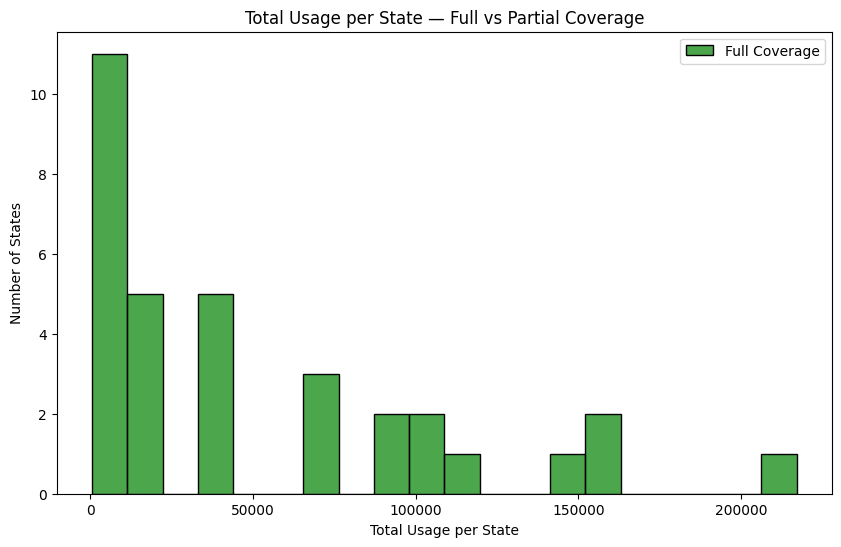

In [ ]:
# Count of unique dates per state
state_date_counts = energy_raw.groupby('States')['Dates'].nunique()
n_dates = energy_raw['Dates'].nunique()

# Boolean mask for full coverage states
full_coverage_mask = state_date_counts == n_dates

# Data split
full_coverage_usage = state_usage_sum[full_coverage_mask]
partial_coverage_usage = state_usage_sum[~full_coverage_mask]

plt.figure(figsize=(10,6))
sns.histplot(partial_coverage_usage, bins=20, color='grey', label='Partial Coverage', alpha=0.6)
sns.histplot(full_coverage_usage, bins=20, color='green', label='Full Coverage', alpha=0.7)

plt.xlabel('Total Usage per State')
plt.ylabel('Number of States')
plt.title('Total Usage per State — Full vs Partial Coverage')
plt.legend()
plt.show()


In [ ]:
energy_raw.duplicated().sum()

np.int64(12)

Missing Value Analysis


In [ ]:
energy_raw=energy_raw.set_index("Dates")
energy_raw.head()

,States,Regions,latitude,longitude,Usage
Dates,,,,,
2019-01-02,Punjab,NR,31.519974,75.980003,119.9
2019-01-02,Haryana,NR,28.450006,77.019991,130.3
2019-01-02,Rajasthan,NR,26.449999,74.639981,234.1
2019-01-02,Delhi,NR,28.669993,77.230004,85.8
2019-01-02,UP,NR,27.599981,78.050006,313.9


In [ ]:
energy_raw.isna().sum()

,0
States,0
Regions,0
latitude,0
longitude,0
Usage,0


<Axes: ylabel='Count'>

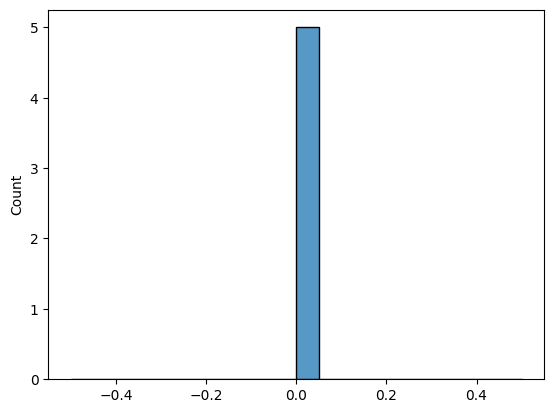

In [ ]:
perc_nan_by_state=energy_raw.isna().sum()/len(energy_raw)
sns.histplot(perc_nan_by_state,bins=20)

In [ ]:
perc_nan_by_state.sort_values(ascending=True)

,0
States,0.0
Regions,0.0
latitude,0.0
longitude,0.0
Usage,0.0


Text(0, 0.5, '% states down')

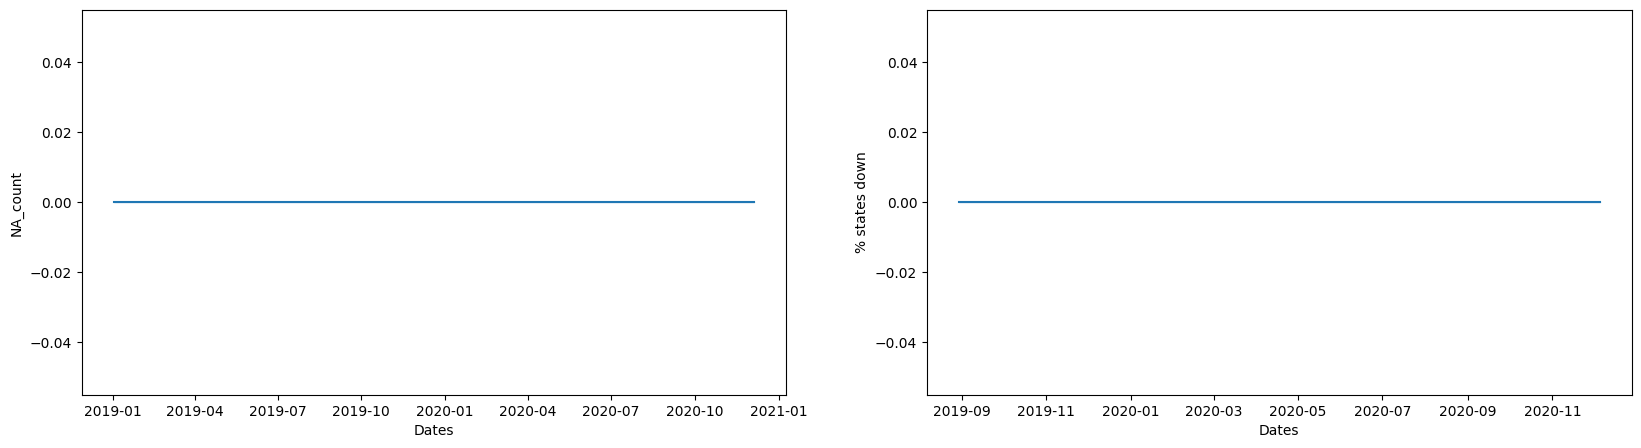

In [ ]:
nan_by_date=energy_raw.isna().sum(axis=1)
nan_by_date=nan_by_date.rename("NA_count").reset_index()
perc_nan_by_date=nan_by_date.copy()
perc_nan_by_date.NA_count=100*perc_nan_by_date.NA_count/len(energy_raw)

fig,ax=plt.subplots(ncols=2,figsize=(20,5))
sns.lineplot(nan_by_date,x="Dates",y="NA_count", ax =ax[0])
sns.lineplot(perc_nan_by_date[-8700:],x="Dates",y="NA_count",ax=ax[1])
ax[1].set_ylabel("% states down")


<Axes: >

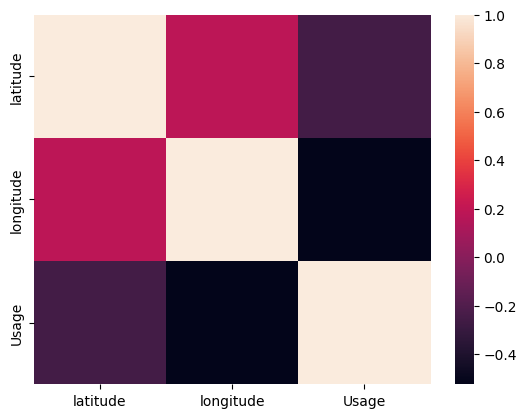

In [ ]:
# Select only numeric columns before calculating the correlation matrix
numeric_energy_raw = energy_raw.select_dtypes(include=np.number)
corr_mat = numeric_energy_raw.corr()
sns.heatmap(corr_mat)

 heatmap shows overall relationships, not state differences

To compare states, use boxplots, barplots, or state-level aggregations



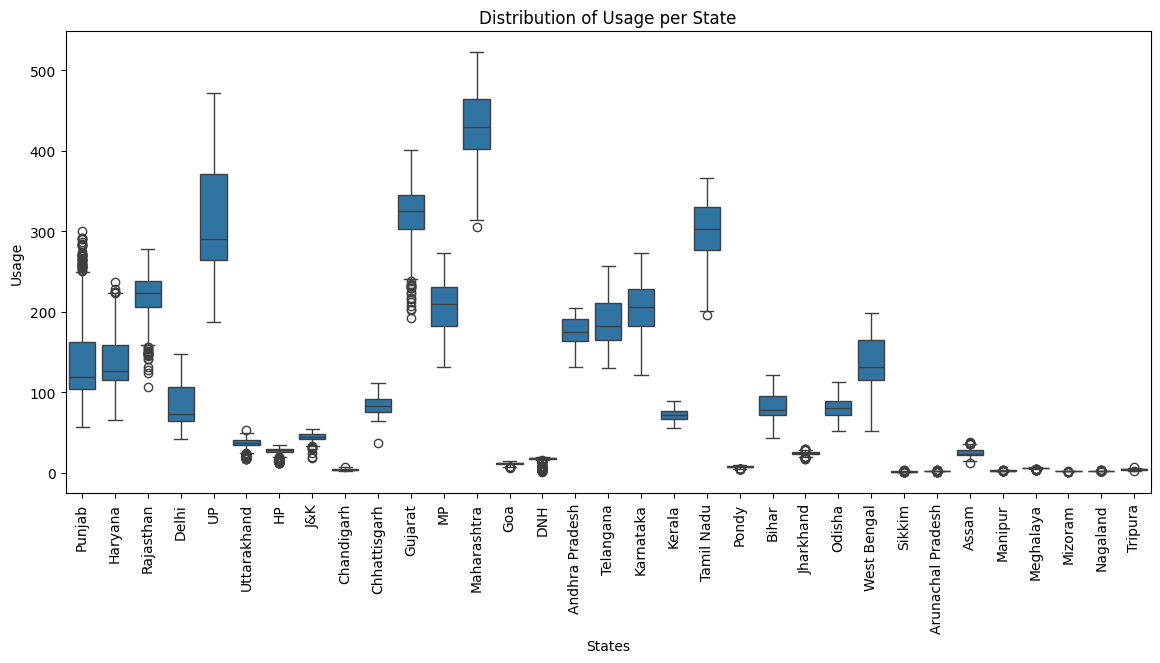

In [ ]:
#Boxplot of Usage per State


plt.figure(figsize=(14,6))
sns.boxplot(x='States', y='Usage', data=energy_raw)
plt.xticks(rotation=90)
plt.title('Distribution of Usage per State')
plt.show()

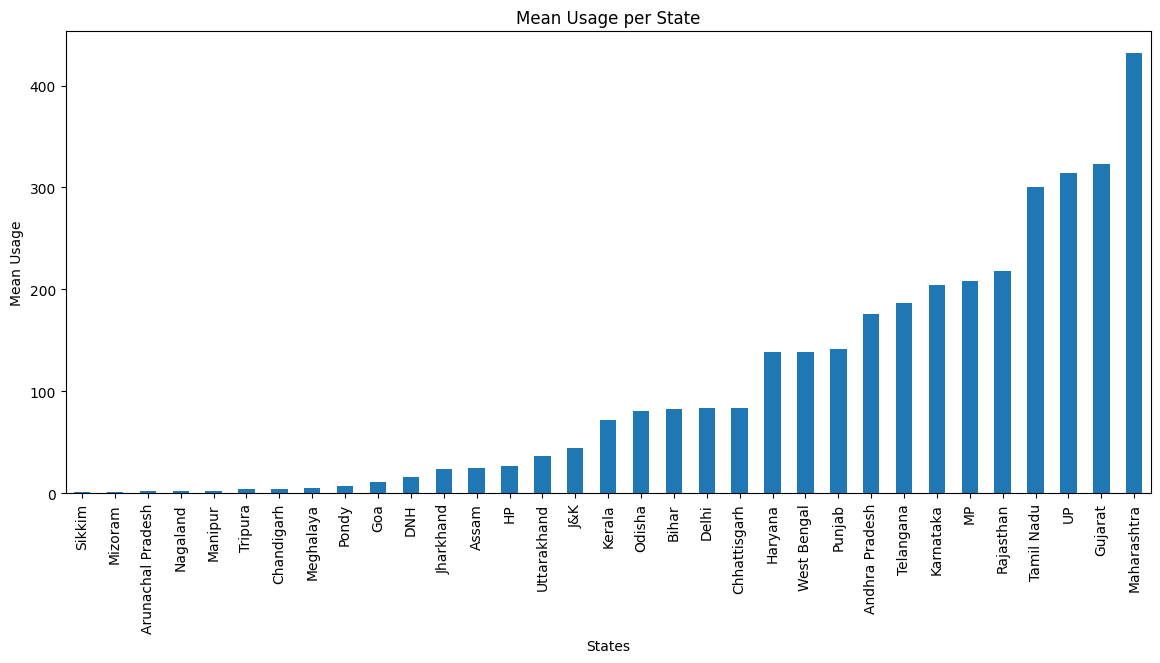

In [ ]:
#Mean Usage per State — barplot


state_usage_mean = energy_raw.groupby('States')['Usage'].mean().sort_values()
plt.figure(figsize=(14,6))
state_usage_mean.plot(kind='bar')
plt.ylabel('Mean Usage')
plt.title('Mean Usage per State')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
std_scaler=StandardScaler()

In [ ]:
numeric_energy_raw = energy_raw.select_dtypes(include=np.number)


df_scaled=std_scaler.fit_transform(numeric_energy_raw.to_numpy())
energy_df=pd.DataFrame(df_scaled,columns=numeric_energy_raw.columns,index=numeric_energy_raw.index)
energy_df.head(3)

,latitude,longitude,Usage
Dates,,,
2019-01-02,1.357179,-0.801097,0.145623
2019-01-02,0.857704,-0.657813,0.235247
2019-01-02,0.532309,-0.985719,1.129761


In [ ]:
#seasonality in usage
energy_df=energy_df.reset_index()
energy_df.head(2)

,Dates,latitude,longitude,Usage
0,2019-01-02,1.357179,-0.801097,0.145623
1,2019-01-02,0.857704,-0.657813,0.235247


In [ ]:
energy_df["monthofyear"]=[str(n).zfill(2)+"-"+m for n,m in zip(energy_df.Dates.dt.month,energy_df.Dates.dt.month_name())]

energy_df["month"] = energy_df.Dates.dt.to_period("M")
energy_df["dayofweek"] = [str(n).zfill(2)+"-"+m for n, m in zip(energy_df.Dates.dt.dayofweek, energy_df.Dates.dt.day_name())]
energy_df["day"] = energy_df.Dates.dt.to_period("D")
energy_df["hour"] = energy_df.Dates.dt.to_period("h")
0.15
energy_df.head(3)

,Dates,latitude,longitude,Usage,monthofyear,month,dayofweek,day,hour
0,2019-01-02,1.357179,-0.801097,0.145623,01-January,2019-01,02-Wednesday,2019-01-02,2019-01-02 00:00
1,2019-01-02,0.857704,-0.657813,0.235247,01-January,2019-01,02-Wednesday,2019-01-02,2019-01-02 00:00
2,2019-01-02,0.532309,-0.985719,1.129761,01-January,2019-01,02-Wednesday,2019-01-02,2019-01-02 00:00


In [ ]:
#aggregations on data
#monthly periodicity

cols=[i for i in energy_raw.columns if i.startswith("Energy_")]
cols.append("monthofyear")
energy_df=energy_df.set_index("Dates")
energy_df




,latitude,longitude,Usage,monthofyear,month,dayofweek,day,hour
Dates,,,,,,,,
2019-01-02,1.357179,-0.801097,0.145623,01-January,2019-01,02-Wednesday,2019-01-02,2019-01-02 00:00
2019-01-02,0.857704,-0.657813,0.235247,01-January,2019-01,02-Wednesday,2019-01-02,2019-01-02 00:00
2019-01-02,0.532309,-0.985719,1.129761,01-January,2019-01,02-Wednesday,2019-01-02,2019-01-02 00:00
2019-01-02,0.893496,-0.628878,-0.148240,01-January,2019-01,02-Wednesday,2019-01-02,2019-01-02 00:00
2019-01-02,0.719408,-0.515902,1.817452,01-January,2019-01,02-Wednesday,2019-01-02,2019-01-02 00:00
...,...,...,...,...,...,...,...,...
2020-12-05,0.263854,1.674722,-0.866093,12-December,2020-12,05-Saturday,2020-12-05,2020-12-05 00:00
2020-12-05,0.389216,1.389527,-0.837654,12-December,2020-12,05-Saturday,2020-12-05,2020-12-05 00:00
2020-12-05,0.086584,1.505258,-0.873848,12-December,2020-12,05-Saturday,2020-12-05,2020-12-05 00:00


calculating average of usage in a month of each state

In [ ]:


#  recreate 'monthofyear' using energy_raw['Dates'] for clarity
energy_raw['monthofyear'] = [str(n).zfill(2) + "-" + m for n, m in zip(energy_raw.index.month, energy_raw.index.month_name())]


# Calculate the average usage per state and month of year
state_month_avg_usage = energy_raw.groupby(['States', 'monthofyear'])['Usage'].mean().reset_index()

# Rename the columns for clarity
state_month_avg_usage.columns = ['variable', 'monthofyear', 'value']

# Display the resulting DataFrame
print(state_month_avg_usage)

           variable   monthofyear       value
0    Andhra Pradesh    01-January  177.196296
1    Andhra Pradesh   02-February  170.628571
2    Andhra Pradesh      03-March  171.112963
3    Andhra Pradesh      04-April  184.696154
4    Andhra Pradesh        05-May  172.217391
..              ...           ...         ...
391     West Bengal     08-August  135.980000
392     West Bengal  09-September  156.117647
393     West Bengal    10-October  143.177143
394     West Bengal   11-November  135.679412
395     West Bengal   12-December  142.182857

[396 rows x 3 columns]


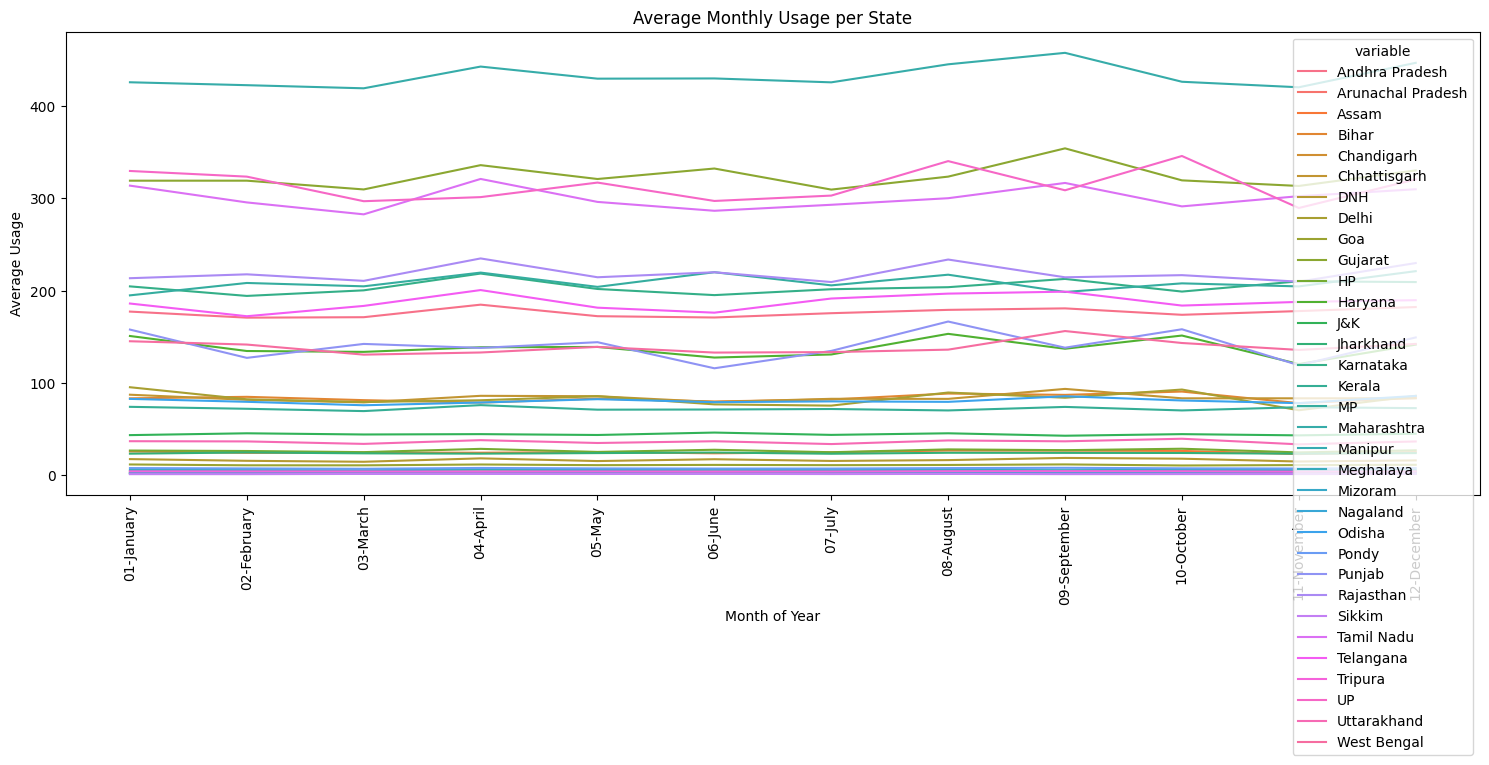

In [ ]:
# Plot the average usage per state and month of year
plt.figure(figsize=(15, 7))
sns.lineplot(data=state_month_avg_usage, x='monthofyear', y='value', hue='variable')

plt.xticks(rotation=90)
plt.xlabel('Month of Year')
plt.ylabel('Average Usage')
plt.title('Average Monthly Usage per State')
plt.tight_layout()
plt.show()

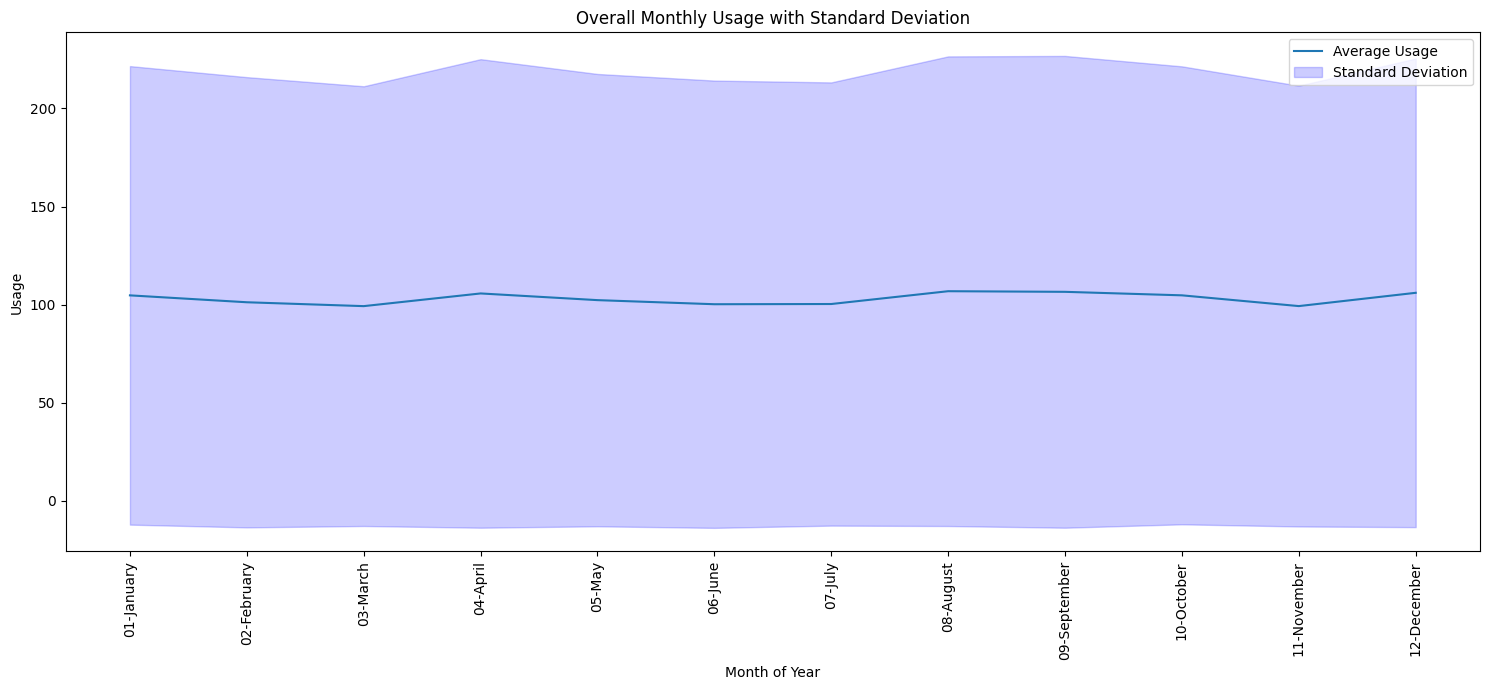

In [ ]:

overall_monthly_avg_usage = energy_raw.groupby('monthofyear')['Usage'].mean().reset_index()
monthly_stats = energy_raw.groupby('monthofyear')['Usage'].agg(['mean', 'std']).reset_index()

#  overall average usage per month with a shaded area for standard deviation
plt.figure(figsize=(15, 7))

#  mean line
sns.lineplot(data=monthly_stats, x='monthofyear', y='mean', label='Average Usage')

# Add the standard deviation as a shaded area (error band)
# The error band will span from mean - std to mean + std
plt.fill_between(monthly_stats['monthofyear'],
                 monthly_stats['mean'] - monthly_stats['std'],
                 monthly_stats['mean'] + monthly_stats['std'],
                 color='blue', alpha=0.2, label='Standard Deviation')

plt.xticks(rotation=90)
plt.xlabel('Month of Year')
plt.ylabel('Usage')
plt.title('Overall Monthly Usage with Standard Deviation')
plt.legend() # Show the legend to identify the lines and shaded area
plt.tight_layout()
plt.show()

Now that we have found out mean and standard deviation of the usage and in the earlier boxplot we have found out the mean usage of each state and their outliers.

here we segregate usage median based on months to find out hoe usage varies throughout states based on the months and seasons

In [ ]:
energy_raw['Month'] = energy_raw.index.month
energy_raw['Year'] = energy_raw.index.year

In [ ]:
monthly_usage = energy_raw.groupby(['States', 'Month'])['Usage'].mean().reset_index()


Heatmap: Visualize monthly usage intensity per state


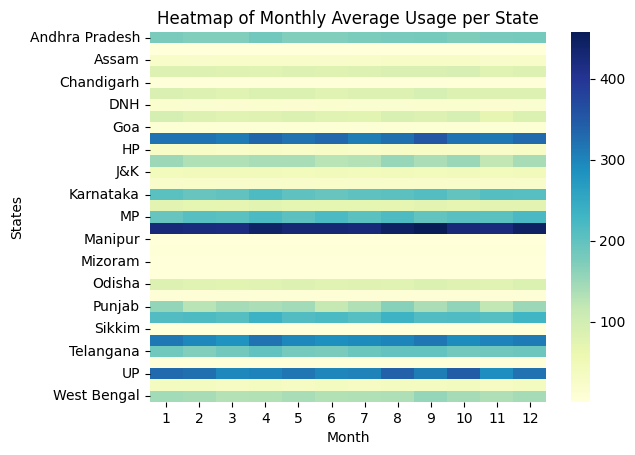

In [ ]:
pivot_df = monthly_usage.pivot(index='States', columns='Month', values='Usage')
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title("Heatmap of Monthly Average Usage per State")
plt.show()


now we can use 2 different models to plot and forecast future usage by observing trends in the data

the 2 models are prophet and SARIMAX

 Prophet is a time series forecasting model developed by Facebook that is particularly good at handling time series with strong seasonality and holidays. It decomposes the time series into trend, seasonality, and holiday components.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkxiejw7/6wkj9pik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkxiejw7/9qwfvgx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64016', 'data', 'file=/tmp/tmpqkxiejw7/6wkj9pik.json', 'init=/tmp/tmpqkxiejw7/9qwfvgx3.json', 'output', 'file=/tmp/tmpqkxiejw7/prophet_modelmdi625h2/prophet_model-20250516110041.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:00:41 - cmdstanpy - INFO - Chain [1] start processing
I

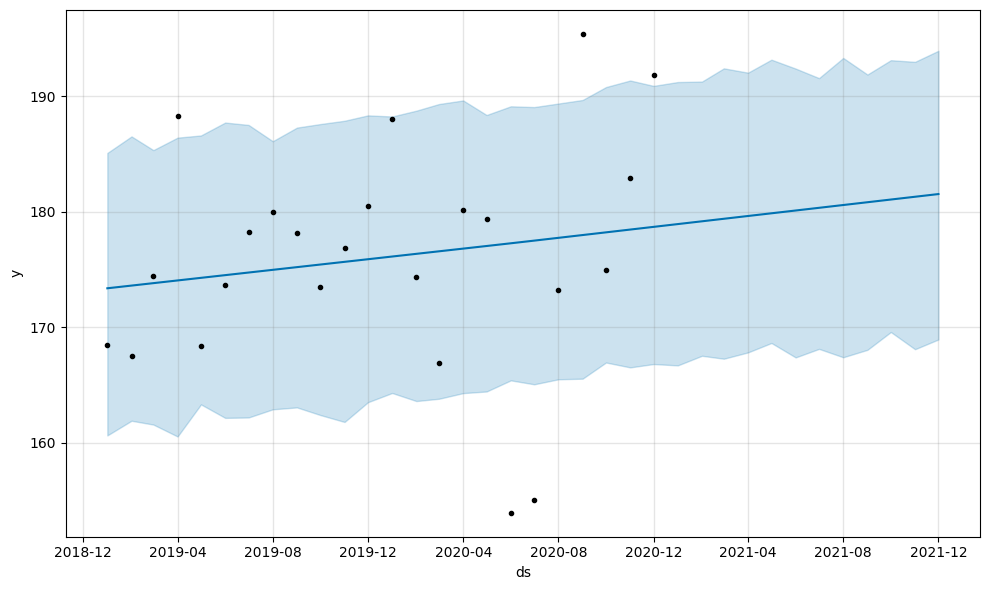

In [ ]:
from prophet import Prophet


energy_raw['Month'] = energy_raw.index.month
energy_raw['Year'] = energy_raw.index.year


# Group by States, Year, and Month to get monthly averages
monthly_usage = energy_raw.groupby(['States', 'Year', 'Month'])['Usage'].mean().reset_index()

# Filter data for Andhra Pradesh
ap_data = monthly_usage[monthly_usage['States'] == 'Andhra Pradesh'].copy() # Use .copy() to avoid SettingWithCopyWarning

# Create the 'ds' column as a datetime object representing the start of each month
# Combine 'Year' and 'Month' to create a date string and convert to datetime
ap_data['ds'] = pd.to_datetime(ap_data['Year'].astype(str) + '-' + ap_data['Month'].astype(str) + '-01')


ap_data = ap_data.rename(columns={'Usage': 'y'})

ap_data = ap_data[['ds', 'y']]

model = Prophet()
model.fit(ap_data)

# Create future dataframe for 12 months
# Use 'MS' frequency for month start
future = model.make_future_dataframe(periods=12, freq='MS')

forecast = model.predict(future)
fig = model.plot(forecast)

SARIMAX is a classical statistical time series model. It models the time series based on its past values, past forecast errors, and seasonal components.

In [ ]:

energy_raw['Month'] = energy_raw.index.to_period('M')
monthly_usage = energy_raw[energy_raw['States'] == 'Andhra Pradesh'].groupby('Month')['Usage'].mean()
monthly_usage.index = monthly_usage.index.to_timestamp()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(monthly_usage, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = results.get_forecast(steps=12)
pred = forecast.predicted_mean
conf = forecast.conf_int()


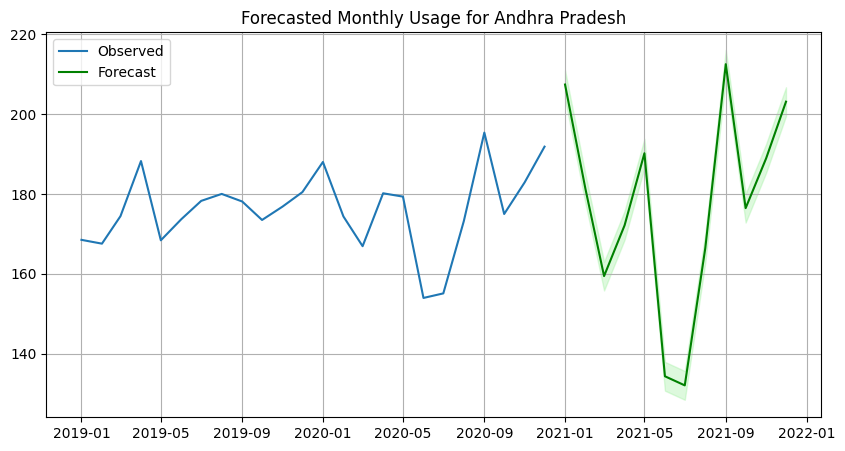

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_usage, label='Observed')
plt.plot(pred.index, pred, color='green', label='Forecast')
plt.fill_between(pred.index, conf.iloc[:, 0], conf.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.legend()
plt.title('Forecasted Monthly Usage for Andhra Pradesh')
plt.grid(True)
plt.show()
